# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('/Users/tinghaokao/Desktop/data/paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [3]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


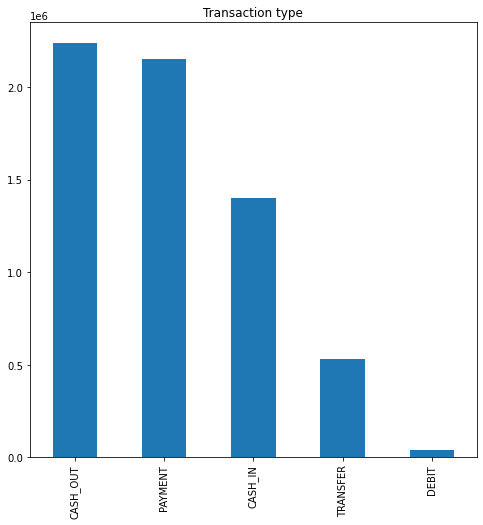

In [6]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

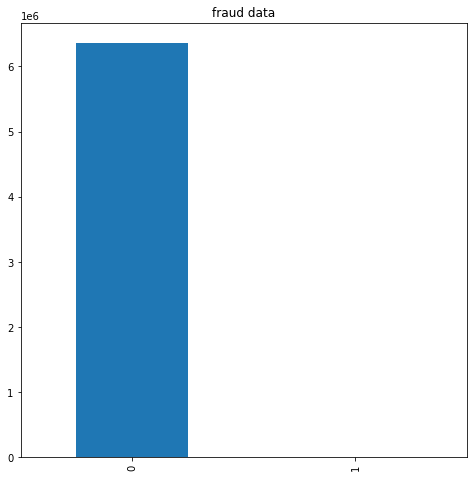

In [7]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [8]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

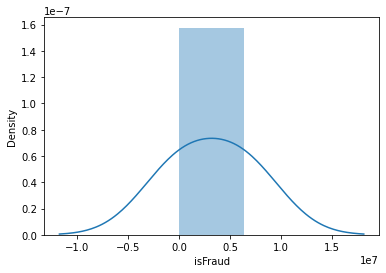

In [9]:
sns.distplot(data.isFraud.value_counts())

In [10]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [11]:
# Your response here
# the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<AxesSubplot:>

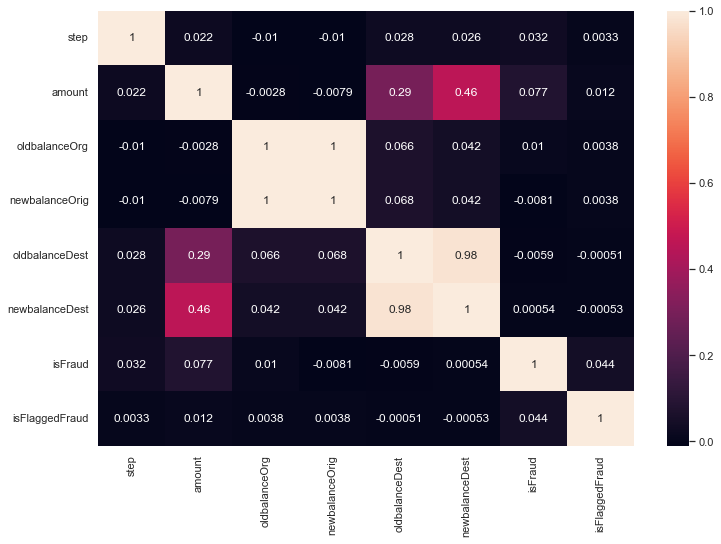

In [13]:
# Your code here
# check correlation first
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data.corr(), annot=True)

In [14]:
data.drop(['oldbalanceDest','newbalanceDest','oldbalanceOrg'], axis=1, inplace=True)

In [15]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
# Create dummies fform transfer type
dummies = pd.get_dummies(data['type'])
data_dummies = pd.concat([data, dummies], axis=1)

In [17]:
data_dummies.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

<AxesSubplot:>

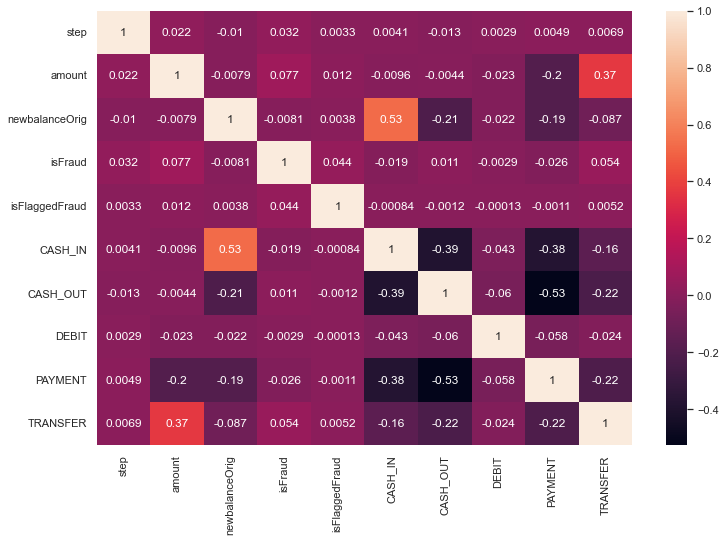

In [18]:
sns.heatmap(data_dummies.corr(), annot=True)

### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
# Your code here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [23]:
# check the size and resample it so that both have equal number

majority = data_dummies[data_dummies['isFraud'] == 0]
minority = data_dummies[data_dummies['isFraud'] == 1]
 
# Downsample majority class
majority_down = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
data_down = pd.concat([majority_down, minority])

data_down['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [25]:
y = data_down['isFraud']
X = data_down.drop('isFraud', axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 9) (3286, 9) (13140,) (3286,)


In [26]:
# fit LR and predict
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# check the score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6320754716981132


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
print('precision: ', precision_score(y_test,y_pred))
print('recall:    ', recall_score(y_test, y_pred))
print('f1_score:  ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

precision:  0.575853572685674
recall:     0.9975609756097561
f1_score:   0.730194153090828
[[ 441 1205]
 [   4 1636]]


### Now pick a model of your choice and evaluate its accuracy.

In [30]:
# Your code here
# check KNN

# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predict)
print(knn_accuracy)

0.7915398660986002


In [32]:
print('precision: ', precision_score(y_test,knn_predict))
print('recall:    ', recall_score(y_test, knn_predict))
print('f1_score:  ', f1_score(y_test, knn_predict))
print(confusion_matrix(y_test,knn_predict))

precision:  0.7774549680418361
recall:     0.8158536585365853
f1_score:   0.796191609639988
[[1263  383]
 [ 302 1338]]


### Which model worked better and how do you know?

In [33]:
# Your response here
# KNN works better than LR, higher accuracy and other scores

### Let's use NearMiss method for undersampling and compare the results with previous

In [34]:
from imblearn.under_sampling import NearMiss
NM = NearMiss()
X_train, y_train = NM.fit_resample(X_train, y_train)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[ 441 1205]
 [   4 1636]]
0.6320754716981132
0.9975609756097561


### And now let's apply SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state=42)
X_resample, y_resample = SM.fit_resample(X_train, y_train)

In [38]:
np.bincount(y_train)

array([6567, 6567])

In [39]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[ 441 1205]
 [   4 1636]]
0.6320754716981132
0.9975609756097561


### Apply your model on improved data

In [45]:
# apply KNN

knn = KNeighborsClassifier()
knn.fit(X_resample, y_resample)

knn_predict = knn.predict(X_resample)

knn_accuracy_ = accuracy_score(y_resample, knn_predict)
print(knn_accuracy_)

# scores improved by +6%

0.8530531445104309


### Calculate classification report for imbalanced data to evaluate the models

In [47]:
from imblearn.metrics import classification_report_imbalanced

In [48]:
print(classification_report_imbalanced(y_test, knn.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.77      0.82      0.79      0.79      0.62      1646
          1       0.78      0.82      0.77      0.80      0.79      0.63      1640

avg / total       0.79      0.79      0.79      0.79      0.79      0.63      3286



### What is your conclusion?